## Healthcare for All

Your task as a data analyst is to help improving the process by developing machine learning models to predict the gift amount based on X features. Follow the data analysis workflow to build the model.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('4.01_healthcare.csv') # this file is in files_for_lesson_and_activities folder
data#.head()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90564,FL,,4803,XXXX,,F,S2,6.0,H,733,875,4,3,285,288,333,334,11390,,59,23,5,12,9702,L4D,24,3.0,3.375000
90565,AK,,0,XXXX,,M,C2,NaN,,988,1025,6,6,433,481,499,535,18807,,14,6,5,12,9702,L1G,1,NaN,25.000000
90566,TX,,5001,XXXX,,M,C1,7.0,H,1679,1723,3,3,806,836,802,849,26538,,10,4,3,8,9702,L1F,1,NaN,20.000000
90567,MI,,3801,XXXX,X,M,C3,NaN,,376,377,4,3,263,264,319,345,12178,,33,14,7,17,9702,L3E,7,3.0,8.285714


In [3]:
data.shape

(90569, 28)

In [4]:
data.describe()

,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
count,90569.000000,70386.000000,90569.000000,90569.00000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,80916.000000,90569.000000
mean,2724.442789,3.878257,1056.391304,1127.42116,4.213473,3.865462,339.373240,386.231083,386.694068,429.977917,15682.038600,46.797204,18.370701,5.343407,12.837351,9701.640606,9.501353,8.114378,13.428585
std,2136.453823,1.855265,936.383991,942.16266,2.302380,2.239738,162.390371,173.082626,160.945113,171.332133,8508.870754,22.944967,8.582096,1.207126,4.499933,5.679884,8.495065,8.310877,10.796349
min,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,9611.000000,1.000000,0.000000,1.285714
25%,112.000000,2.000000,511.000000,553.00000,3.000000,2.000000,230.000000,273.000000,277.000000,314.000000,10770.000000,27.000000,11.000000,5.000000,11.000000,9702.000000,3.000000,4.000000,8.454545
50%,2610.000000,4.000000,735.000000,800.00000,4.000000,3.000000,309.000000,355.000000,353.000000,396.000000,13692.000000,46.000000,18.000000,6.000000,12.000000,9702.000000,7.000000,6.000000,11.666667
75%,4601.000000,5.000000,1206.000000,1320.00000,5.000000,5.000000,414.000000,464.000000,465.000000,513.000000,18128.000000,64.000000,25.000000,6.000000,13.000000,9702.000000,13.000000,11.000000,15.625000
max,9710.000000,7.000000,6000.000000,6000.00000,13.000000,13.000000,1500.000000,1500.000000,1500.000000,1500.000000,159306.000000,195.000000,61.000000,19.000000,78.000000,9702.000000,237.000000,1088.000000,1000.000000


In [3]:
nulls = pd.DataFrame(data.isna().sum()*100/len(data), columns=['percentage'])
nulls.sort_values('percentage', ascending = False)

,percentage
INCOME,22.284667
TIMELAG,10.658172
STATE,0.000000
IC3,0.000000
NGIFTALL,0.000000
RFA_2,0.000000
MAXADATE,0.000000
NUMPRM12,0.000000
CARDPM12,0.000000
CARDPROM,0.000000


The columns might be important factors in predicting the gift value, so even though it has a lot of null values, we will not drop them, at least not before checking correlations.

In [6]:
data.corr()['AVGGIFT'].sort_values(ascending=False)

AVGGIFT     1.000000
INCOME      0.115147
HV2         0.102086
HV1         0.099967
IC5         0.097252
IC4         0.088880
NUMPRM12    0.088064
IC2         0.087900
IC3         0.086453
HV3         0.085160
IC1         0.083434
HV4         0.082829
TIMELAG     0.075476
DOB         0.020624
MAXADATE   -0.000938
CARDPM12   -0.014228
NUMPROM    -0.140556
CARDPROM   -0.189318
NGIFTALL   -0.256253
Name: AVGGIFT, dtype: float64

In [7]:
data.corr()['AVGGIFT'][['INCOME', 'TIMELAG']]

INCOME     0.115147
TIMELAG    0.075476
Name: AVGGIFT, dtype: float64

1 - We might loose up to ~32% of the data if dropping the NaNs (rows). The trade-off here is amount of data vs data quality.

2 - The columns have decent correlation with the target (comparatively) so I wouldn't drop them. The trade-off here is feature importance vs data quality.

3 - To contain the data quality decrease when "making up" data, I wouldn't transform the NaNs into zeros. Using the mean/median will "maintain" our distributions. (I like mean, but median might work better if you have expressive outliers) 

4 - You can also use Interpolation techniques - using information from other columns/rows to find the value to replace.  

Obs.: There are more robust ways to handle NaNs, like interpolations.

#### Activity 1
How many ways exist to cope with the null values? When should you use each one?

How could we find out gender value when this field is null?

The Homeownership has two values [H = Homeowner, U = Unknown]. If you had to fill null values, how would it be?

In [8]:
data['HOMEOWNR'].value_counts()

H    49646
     21051
U    19872
Name: HOMEOWNR, dtype: int64

In [9]:
data['GENDER'].value_counts()

data['GENDER'] = data['GENDER'].apply(lambda x: x if x in ['M', 'F'] else 'O')

data['GENDER'].value_counts()

F    48668
M    37132
O     4769
Name: GENDER, dtype: int64

### Dealing with NaNs

In [4]:
# for 'TIMELAG' I'll choose median to replace the NaNs
# since we have considerable outliers as we saw in .describe()
data['TIMELAG'] = data['TIMELAG'].fillna(data['TIMELAG'].median())

#### Interpolation

<AxesSubplot:>

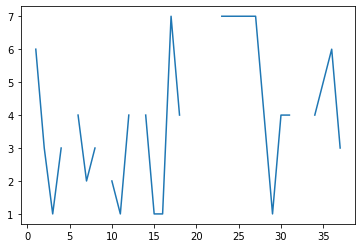

In [11]:
data['INCOME'][0:40].plot()

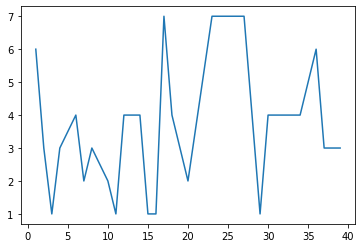

In [5]:
new_income_data = data['INCOME'][0:40].interpolate(method='linear')
# linear interpolation assumes that the rate of change between the values is constant
new_income_data.plot()
plt.show()

In [13]:
data['INCOME'][0:40].value_counts()

4.0    8
7.0    6
1.0    5
3.0    4
2.0    3
6.0    2
5.0    1
Name: INCOME, dtype: int64

#### Comparing distributions to choose which technique to use:

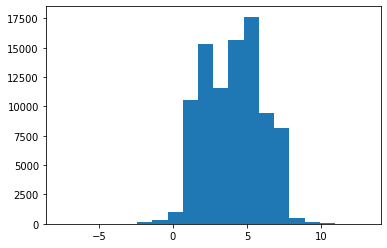

In [14]:
# you can try different methods and check which ones are more normally distributed
plt.hist(data['INCOME'].interpolate(method='polynomial', order=2), bins=20) 
plt.show()

Want a better understanding of polynomial method? Here is something to [read](https://whatis.techtarget.com/definition/polynomial-interpolation).

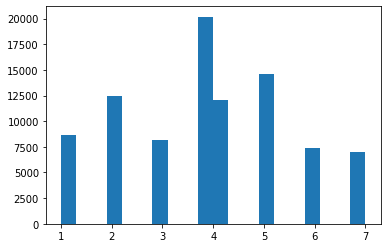

In [15]:
plt.hist(data['INCOME'].fillna(data['INCOME'].mean()), bins=20)
plt.show()

It's not wise to make a decision based on 'how it looks on the plot'. When we learn about p-values we'll see how to check for normality with an actual metric.

In [16]:
# I'll choose interpolate with polynomial method
data['INCOME'] = data['INCOME'].interpolate(method='polynomial', order=2)

#### The order of the rows matters for interpolation:
We can see that the plot goes crazy, and also, if we check, the interpolated values will be different. Here is proof:

In [17]:
# shuffling the df but maintaining a column with the original indexes
data1 = data.copy().sample(frac=1).reset_index().rename(columns={'index': 'ind'})
data1

,ind,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,37477,CA,,4701,XXXX,,M,U2,4.000000,H,1908,1882,5,5,301,302,330,373,12741,,70,31,5,12,9702,L1E,15,5.0,7.466667
1,25656,TN,,0,XXXX,,M,,2.000000,U,700,710,4,6,255,338,281,349,17850,,67,19,6,24,9702,L3E,12,10.0,7.166667
2,48827,GA,,2901,XXXX,,M,S2,4.000000,H,0,0,0,0,0,0,0,0,0,,27,11,6,14,9702,L2F,3,12.0,11.666667
3,51024,FL,,1710,XXXX,,M,C1,1.032237,,2527,2689,8,7,486,560,675,741,55082,,48,19,6,18,9702,L2G,4,20.0,67.500000
4,309,CA,,2809,XXXX,,M,S1,7.000000,H,2296,2384,7,7,549,588,624,662,23721,,63,25,4,9,9702,L1F,13,5.0,8.846154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90564,55659,TX,,1703,XXXX,,M,C2,4.006587,,546,574,3,4,347,396,380,453,17130,,130,32,5,23,9702,L1E,64,4.0,11.101562
90565,18741,FL,,5608,XXXX,,M,T1,2.000000,H,1286,1359,7,7,500,502,542,551,19082,,69,27,5,10,9702,L1E,16,4.0,5.437500
90566,88670,MN,,4411,XXXX,,F,R2,3.000000,H,702,719,4,2,336,352,358,375,12276,Y,60,23,5,12,9702,L1E,15,12.0,6.800000
90567,4285,TX,,3201,XXXX,,M,C1,2.000000,U,1189,1402,3,4,669,724,712,754,26834,,27,11,6,13,9702,L2F,3,12.0,9.000000


In [18]:
# applying interpolation to shuffled df
data1['INCOME'] = data1['INCOME'].interpolate(method='polynomial', order=2)

<AxesSubplot:>

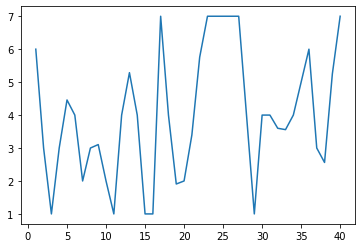

In [19]:
data['INCOME'].loc[0:40].plot()

<AxesSubplot:>

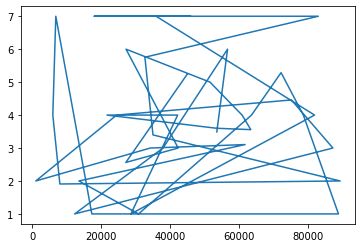

In [20]:
data1.sort_values('ind')['INCOME'][0:40].plot()

### Checking outliers

<AxesSubplot:xlabel='TIMELAG', ylabel='Density'>

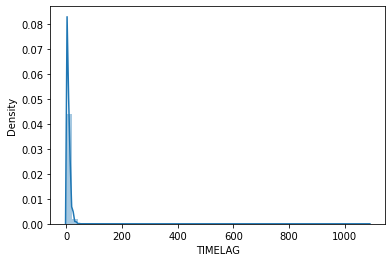

In [21]:
sns.distplot(data['TIMELAG'])

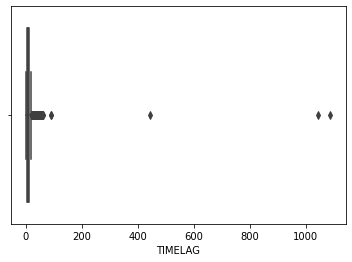

In [22]:
sns.boxplot(data['TIMELAG'])
plt.show()

In [23]:
# I would apply a 'hybrid' method here, drop outliers above 80 first
# because it's just 5 rows:

data = data[data['TIMELAG'] < 80]
data

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.000000,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.000000,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.000000,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.000000,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90564,FL,,4803,XXXX,,F,S2,6.000000,H,733,875,4,3,285,288,333,334,11390,,59,23,5,12,9702,L4D,24,3.0,3.375000
90565,AK,,0,XXXX,,M,C2,7.140318,,988,1025,6,6,433,481,499,535,18807,,14,6,5,12,9702,L1G,1,6.0,25.000000
90566,TX,,5001,XXXX,,M,C1,7.000000,H,1679,1723,3,3,806,836,802,849,26538,,10,4,3,8,9702,L1F,1,6.0,20.000000
90567,MI,,3801,XXXX,X,M,C3,6.286561,,376,377,4,3,263,264,319,345,12178,,33,14,7,17,9702,L3E,7,3.0,8.285714


In [24]:
#MAE/MSE/RMSE # getting rid o the last NaN, resulted from the interpolation:
data = data.dropna()

NameError: name 'MAE' is not defined

### Feature Engineering

In [ ]:
# apply log transformation since it will make the 'outliers' interval smaller
def log_transform(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

# or
log_transform = lambda x: np.log(x) if np.isfinite(x) and x!=0 else np.NAN

In [ ]:
data1 = data.copy()

data1['TIMELAG'] = data1['TIMELAG'].apply(log_transform).fillna(data1['TIMELAG'].mean())

Why log? Easier to see skewed/exponential data, since the log is the inverse of the exponential. Also, it decreases variability.


In [ ]:
sns.distplot(data1['TIMELAG'])

In [ ]:
# below 8 might still be outliers
data1 = data1[data1['TIMELAG'] < 6]
data1
# WATCH OUT! Many rows were lost... this can impact other columns.

##### Thoughts on what we've done so far:
Have I made the right choices? Checking correlations again makes me think that NO.

But to be sure I should have run the metrics of the model first, to have a threshold to compare it after each of the transformations.

OBS.: Document your work or you'll get lost in it :)

#### Scaling

Below there are three techniques for scaling, you'll pick only one according to your dataset. Scaling helps the model to converge by decreasing the distance between the values. Besides improving model performance, it might also increase it's metrics.

In [7]:
from sklearn.model_selection import train_test_split

X = data.drop('AVGGIFT', axis=1)
y = data['AVGGIFT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

##### Standardization/Standard Scaler

For each column, each value in the column is subtracted by the mean of the column and then divided by the standard deviation.
 
Works row wise, so it takes information from the whole column. It is wise to do the train/test split beforehand.

You will .fit() on the training set and then .transform() both (train and test).

In [8]:
from sklearn.preprocessing import StandardScaler
import pickle

# Pickle - you'll use it at least for these steps:
# to save the scaler
# to save the encoder
# to save the model

transformer = StandardScaler()
transformer.fit(X_train_num)

# saving in a pickle
with open('std_transformer.pickle', 'wb') as file:
    pickle.dump(transformer, file)
    
# loading from a pickle  
with open('std_transformer.pickle', 'rb') as file:
    loaded_transformer = pickle.load(file)

X_train_ = loaded_transformer.transform(X_train_num)
X_test_ = loaded_transformer.transform(X_test_num)

# if you need to un-scale afterwards, speacially if you scaled target variable:
unscaled_X_train = loaded_transformer.inverse_transform(X_train_)

# it makes sense to scale the target variable as well
unscaled_X_train[0][0]

4601.0

##### Normalization

For each column, each value is divided by the magnitude of the column. The magnitude is calculated as the euclidean distance.

It is calculated column wise, so it takes the values of a whole row to calculate. It is wise to do the X/y split beforehand.

When using Normalizer() you might lose considerable amount of information in the dummified columns. So it might be a good idea to take the categorical columns out before scaling, and then concatenating them together again, but watch out because that too will have consequences to your model.

In [ ]:
from sklearn.preprocessing import Normalizer

numericals = X.select_dtypes(np.number) # using only X, and not y

transformer = Normalizer()
transformer.fit(numericals)
x_normalized = transformer.transform(numericals)

##### Min-max scaler

For each column, each value in the column is subtracted by the max of the column and then divided by the difference of max and min of the column. It is very sensitive to the presence of outliers.

Works row wise, so it takes information from the whole column. It is wise to do the train/test split beforehand.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numericals = data.select_dtypes(np.number)

transformer = MinMaxScaler().fit(numericals)
x_min_max = transformer.transform(numericals)
x_min_max

**REMEMBER:** if you scaled your data, you'll have to apply the same scale to the new data you'll apply the predictions to.

**ALSO:** you might need to un-scale it for better readability (specially if you scaled the target variable).

Some more clarification on where to use which [here](https://towardsdatascience.com/what-is-feature-scaling-why-is-it-important-in-machine-learning-2854ae877048).

### Now, the categoricals

In [ ]:
for col in data.select_dtypes('object'):
    print(data[col].value_counts(), '\n')

I believe that for HOMEOWNR the empty value is supposed to be 'U' for unknown, but this needs checking ofc. 
 
The problem on simply making it 'U' is that, if it isn't, you'll be inducing bias.
 
Other options could be considering the empty space as a category of it's own.

I don't think removing rows (too many) or the column (don't know correlation with the target yet) would be a good idea.

I'm keeping it as a category of it's own, but for now your guess is as good as mine.

#### Bucketing

When we have too many categories, and some are little represented, we can bucket several of them into one.

In [ ]:
# just taking a look at the categories and counts
categories = pd.DataFrame(data['STATE'].value_counts())
categories.columns = ['counts']
categories

In [ ]:
# making a list with the categories i want to replace
group_states = categories[categories['counts'] < 2000].index
group_states

I chose a threshold, but at this point, your guess is as good as mine (make it a reasonable one).

In [ ]:
def clean_state(x):
    if x in group_states:
        return 'other'
    else:
        return x

In [ ]:
data['STATE'] = data['STATE'].apply(clean_state)

In [ ]:
data['STATE'].value_counts()

#### Feature Extraction

In [ ]:
# we will use the column MDMAUD and extract only the info that makes sense for us
data['MDMAUD'].value_counts()

In [ ]:
data['MDMAUD'] = data['MDMAUD'].apply(lambda x: x[0]+x[2])
data['MDMAUD'].value_counts()

### Feature Selection - Correlations and Multi-Colinearity

#### Checking some correlations with our traditional methods

In [ ]:
data.corr()['AVGGIFT'].sort_values(ascending=False)

#### VIF

VIF is used to calculate multicolinearity between features, helping on the feature selection. For that purpose, you won't have the target variable in the calculation.

While the correlation methods we've seen so far (pearson, spearman, etc) calculates the correlation of one feature vs another, VIF checks correlation of many features vs another.

VIF uses variation, which is calculated using the standard deviation, to return a measure of "explainability" of several features against another. How the spread of the values of that variable can be "explained" or "predicted" by the other variables.

It is calculated through linear regression. For each feature you can imagine that a linear regression is made where that feature is considered the "target variable" and the other variables are considered the features.

The rule of thumb is that features with VIF above 10 could be dropped without decreasing the metrics of your model, but I don't buy it... so make sure you always test your metrics before and after dropping the columns :)

**IMPORTANT:** Everytime you drop a column, you need to re-calculate the VIF, because it will affect the factors from all the other columns.

In [ ]:
data1 = data.copy()
numericals = data1.select_dtypes(np.number).drop(columns=['AVGGIFT'], axis=1) # 'HV2', 'IC3', 'NUMPROM', 'IC2'

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# vif uses OLS to calculate the factor, so we don't have the intercept
# that's why we need to assign it:
vif_numericals = add_constant(numericals)
vif_numericals

In [ ]:
# To remove multicolinearity automatically:

threshold = 30

while True:
    # calculates the vif
    values = [variance_inflation_factor(np.array(vif_numericals), i)
              for i in range(len(vif_numericals.columns))][1:]
    display(pd.DataFrame(values, index=vif_numericals.columns[1:]).sort_values(0))
    # checks if the highest vif is bigger than the threshold
    if max(values) > threshold:
        # finds the column that has the maximum vif
        col_index = values.index(max(values)) + 1
        column_name = vif_numericals.columns[col_index]
        # drops that column
        vif_numericals = vif_numericals.drop(column_name, axis=1)
    else:
        break

vif_numericals

In [ ]:
# or manually

vif = pd.DataFrame(index=vif_numericals.columns)

vif["VIF Factor"] = [round(variance_inflation_factor(np.array(vif_numericals), i),2)
                     for i in range(len(vif_numericals.columns))]

In [ ]:
vif.sort_values("VIF Factor")

OBS.:

Feature Engineering: transforming data from your dataset.

Feature Extraction: extracting a new column from the existing data.

Feature Selection: discarding the columns you won't need.

### Feature Selection - Categoricals
#### Chi-square test:
Chi-square test is used to determine if there is a significant relationship between two categorical variables. The test is based on a contingency table. The frequency of categories in a variable is compared to the frequencies of categories in another variable.

The order in which frequencies are put in the table does not change the result of the chi-square test, so it won't consider the hierarchy for ordinal categoricals.

Contingency Table:
![](https://i.stack.imgur.com/8YuSA.jpg)

In [ ]:
# contingency table
data_crosstab = pd.crosstab(data['DOMAIN'], data['RFA_2'], margins=True)
data_crosstab

With the contingency table we can check if these two variables are dependent or independent from each other. 

OFC we won't be checking that with our eyes, therefore, a nice way to 'measure' the dependency between the variables is a chi-squared test:

In [ ]:
from scipy.stats import chi2_contingency

stats, p_value, dof, frequencies = chi2_contingency(data_crosstab)
p_value
# the result is a low p_value, so we can assume correlation between the variables

The p_value is used for hypothesis testing and it can be used to measure dependency between two variables. 

A low p_value means that there is significant relationship between two variables.

A reasonable threshold for p_value is 0.05, and it's related to a confidence interval of 95%. But all this is subject for another class :)

**For now:** a p_value below 0.05 means that there is a considerable correlation between two variables, and it is likely that one of them can be dropped without decreasing the metrics of the model.

A more ludicrous example [here](https://statisticsbyjim.com/hypothesis-testing/chi-square-test-independence-example/).

In [ ]:
# Activity 1
# Use the Chi-Square test for measuring the salary differences between men and women.
# Remember that chi-square works on categoricals, so maybe you want to bucket the income into categoricals
data['INCOME'].unique()

In [ ]:
income = data['INCOME'].apply(lambda x: 'high' if x >= 5 else 'medium' if x >= 0 and x < 5 else 'low')
gender = data['GENDER']

data_crosstab = pd.crosstab(income, gender, margins=True)
data_crosstab

In [ ]:
stats, p_value, dof, frequencies = chi2_contingency(data_crosstab)
p_value

#### Dummifying

In [ ]:
data = pd.get_dummies(data)

### Training the model

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('AVGGIFT', axis=1)
y = data['AVGGIFT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(random_state=42)
lr.fit(X_train, y_train)

In [ ]:
lr.score(X_test, y_test)

#### KNN - K Nearest Neighbors

KNN regressor will take the distances from the k nearest neightbors and "average" them for the prediction.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

In [ ]:
knn.score(X_test, y_test)
### Ops... what could be wrong here?

### Analyzing the results

#### Bias-Variance Trade-Off

* Bias is how wrong your predictions are. Related to how similar the average of the predictions is to the average of the actual values.
* Variance is related to how similar the "spread" of the predictions is to the "spread" of the actual values.

![](https://expoundai.files.wordpress.com/2019/05/bvcomplexitycurve-1.png?w=589)

Where:
* Total Error = sum of the residuals;
* Model complexity = the amount of features used.

Read more about it [here](https://machinelearningmastery.com/gentle-introduction-to-the-bias-variance-trade-off-in-machine-learning/).

#### Checking for Over/Under-fitting

* Overfitting is when you have a high variance but low bias. A quick way to check is to see if your train score is higher than your test score. To avoid it try having more data (rows) or removing irrelevant features.
<br><br>
* Underfitting is when you have a high bias but low variance. A quick way to check is to see if your test score is low. To avoid it, you will need to find out more relevant features you can add to your data.
<br><br>
![](https://miro.medium.com/max/700/1*UCd6KrmBxpzUpWt3bnoKEA.png)

Thy good ol' [article](https://towardsdatascience.com/underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6fe4a8a49dbf).

In [ ]:
## Analize your results here :)


### Now it's on you:

- Go through this beautiful notebook and understand what's going on. You will notice that, even though I left a lot of stuff ready, they aren't being applied in the model (except for dealing with the Nans).
<br><br>
- You will apply different feature engineering and feature selection methods, always checking how the model reacts. Feel free to try different approaches to handle the Nans and whatever else you feel like trying out. Write stuff down as you go, and organize the notebook to your liking, so you can use it as future reference and save a lot of your future self's time!
<br><br>
- You will read/interpret the docs on your own for the KNN regressor. I'd focus on: understanding the n_neighbors and weights parameter.
<br><br>
- Check for overfitting and analize your results. Know how to explain the difference between r-squared and adjusted r-squared. [Here](https://medium.com/analytics-vidhya/r-squared-vs-adjusted-r-squared-a3ebc565677b) is a quick and light read. Also, use both metrics + the usual MAE/MSE/RMSE (make sure you can explain the difference between each).
<br><br>
- You have 1h30min to work on it. Keep notes so we can discuss it afterwards.
<br><br>
 ***Good Luck!*** ¯\\_(ツ)_/¯



### THE END ?